<a href="https://colab.research.google.com/github/BhojRajBist/BhojRajBist/blob/main/img_to_potrait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# 📌 Step 1: Upload Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# 📌 Step 2: Read Image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# 📌 Step 3: Apply Image Processing

# A) Blurring
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

# B) Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# C) Edge Detection (Canny)
edges = cv2.Canny(gray_image, 50, 150)

# D) Thresholding
_, binary_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# E) Contour Detection
contours, _ = cv2.findContours(binary_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# 📌 Step 4: Display Results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(image)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")

axs[0, 1].imshow(blurred_image)
axs[0, 1].set_title("Blurred Image")
axs[0, 1].axis("off")

axs[0, 2].imshow(gray_image, cmap="gray")
axs[0, 2].set_title("Grayscale Image")
axs[0, 2].axis("off")

axs[1, 0].imshow(edges, cmap="gray")
axs[1, 0].set_title("Edge Detection")
axs[1, 0].axis("off")

axs[1, 1].imshow(binary_thresh, cmap="gray")
axs[1, 1].set_title("Thresholding")
axs[1, 1].axis("off")

axs[1, 2].imshow(contour_image)
axs[1, 2].set_title("Contours Detected")
axs[1, 2].axis("off")

plt.show()

# 📌 Step 5: Save Processed Images
Image.fromarray(blurred_image).save("blurred_output.png")
cv2.imwrite("grayscale_output.png", gray_image)
cv2.imwrite("edges_output.png", edges)
cv2.imwrite("contours_output.png", cv2.cvtColor(contour_image, cv2.COLOR_RGB2BGR))

print("✅ Processed images saved!")
# Install required libraries
!pip install opencv-python dlib numpy

import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Function to create a portrait
def create_portrait(image_path, output_path="portrait.jpg"):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image.")
        return None

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load face detector
    detector = dlib.get_frontal_face_detector()
    faces = detector(gray)

    if len(faces) == 0:
        print("No face detected!")
        return None

    # Extract the first detected face
    x, y, w, h = faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height()

    # Expand the bounding box for a better portrait effect
    margin = int(0.3 * w)
    x, y = max(0, x - margin), max(0, y - margin)
    w, h = min(image.shape[1], w + 2 * margin), min(image.shape[0], h + 2 * margin)

    # Crop the face region
    portrait = image[y:y + h, x:x + w]

    # Resize to a standard portrait size (optional)
    portrait = cv2.resize(portrait, (600, 800))

    # Save the output
    cv2.imwrite(output_path, portrait)
    print(f"Portrait saved as {output_path}")

    return output_path

# Upload an image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the uploaded file name

# Create and display portrait
portrait_path = create_portrait(image_path)
if portrait_path:
    img = Image.open(portrait_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()


In [ ]:
!pip install opencv-python numpy


Saving IMG_0973.JPG to IMG_0973 (3).JPG


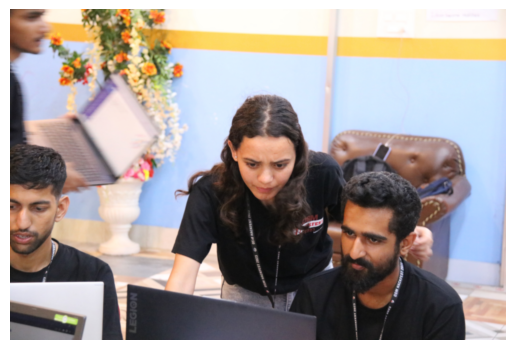

In [ ]:
import cv2
import numpy as np
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Upload an image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the uploaded file name

# Read the image
image = cv2.imread(image_path)

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (25,25), 0)  # Adjust kernel size for more blur

# Save the blurred image
blurred_path = "blurred_image.jpg"
cv2.imwrite(blurred_path, blurred_image)

# Display the blurred image
img = Image.open(blurred_path)
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# 📌 Step 1: Upload Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# 📌 Step 2: Read Image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# 📌 Step 3: Apply Image Processing

# A) Blurring
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

# B) Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# C) Edge Detection (Canny)
edges = cv2.Canny(gray_image, 50, 150)

# D) Thresholding
_, binary_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# E) Contour Detection
contours, _ = cv2.findContours(binary_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# 📌 Step 4: Display Results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(image)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")

axs[0, 1].imshow(blurred_image)
axs[0, 1].set_title("Blurred Image")
axs[0, 1].axis("off")

axs[0, 2].imshow(gray_image, cmap="gray")
axs[0, 2].set_title("Grayscale Image")
axs[0, 2].axis("off")

axs[1, 0].imshow(edges, cmap="gray")
axs[1, 0].set_title("Edge Detection")
axs[1, 0].axis("off")

axs[1, 1].imshow(binary_thresh, cmap="gray")
axs[1, 1].set_title("Thresholding")
axs[1, 1].axis("off")

axs[1, 2].imshow(contour_image)
axs[1, 2].set_title("Contours Detected")
axs[1, 2].axis("off")

plt.show()

# 📌 Step 5: Save Processed Images
Image.fromarray(blurred_image).save("blurred_output.png")
cv2.imwrite("grayscale_output.png", gray_image)
cv2.imwrite("edges_output.png", edges)
cv2.imwrite("contours_output.png", cv2.cvtColor(contour_image, cv2.COLOR_RGB2BGR))

print("✅ Processed images saved!")
